## Analyze rates_delay_loss made by test_env.py
* ex. all traces (train one by one - in any order (random, gap to baseline etc.))
* The important thing is that you have tested on multiple traces (they are keys in l_rate)

In [ ]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

In [ ]:
conf_name = f"test_bla"

In [ ]:
prefix = "../output/rates_delay_loss_"
suffix = ".pickle"

pickle_path = prefix+conf_name+suffix
print(pickle_path)
l_rate = pd.read_pickle(pickle_path)
time_step = 200
reward_profile=0
print(time_step)

../output/rates_delay_loss_random_traces_ghent.pickle
200


In [ ]:
l_rate.keys()

dict_keys(['./new_data/logs_all_4G_Ghent_json/report_bicycle_0001.json'])

In [ ]:
l_rate['./new_data/logs_all_4G_Ghent_json/report_car_0003.json'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

report_car_0003


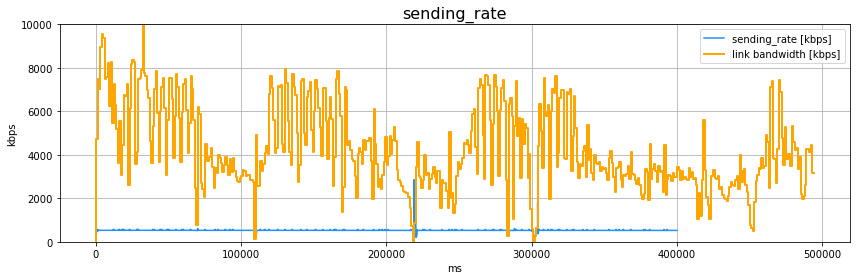



report_bus_0010


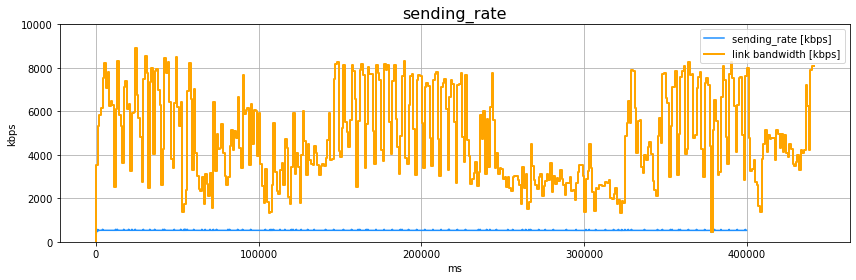



report_bus_0003


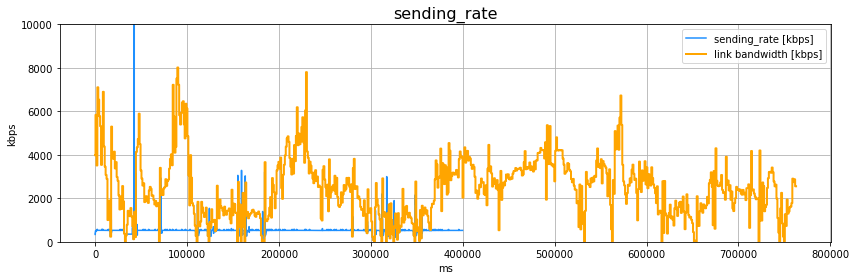



report_car_0002


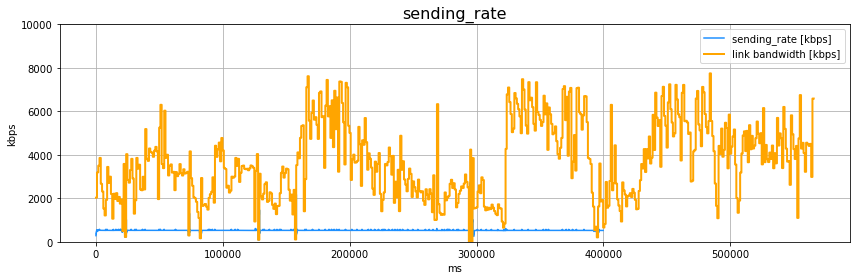



report_foot_0004


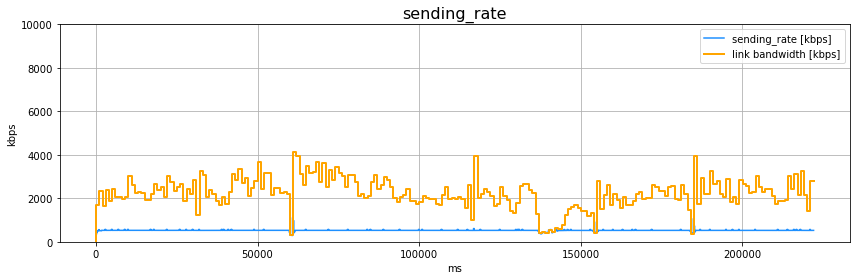



report_foot_0001


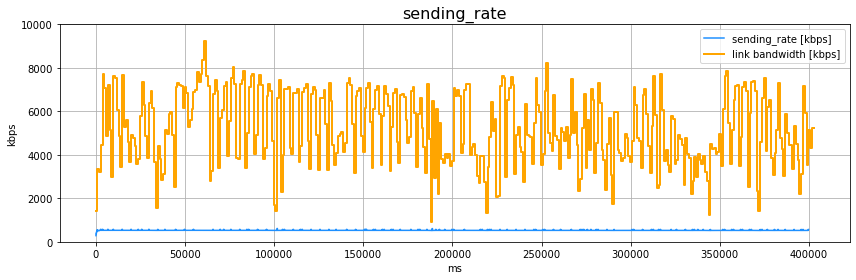



report_foot_0008


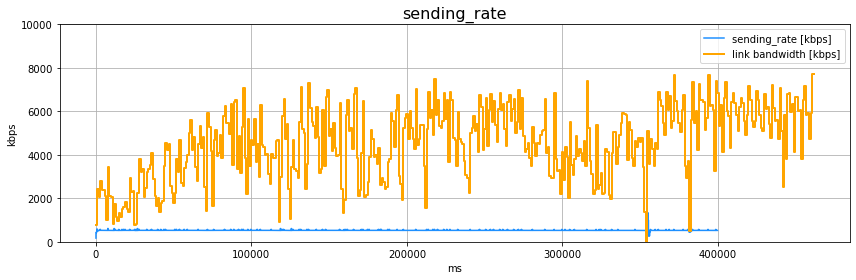



report_car_0008


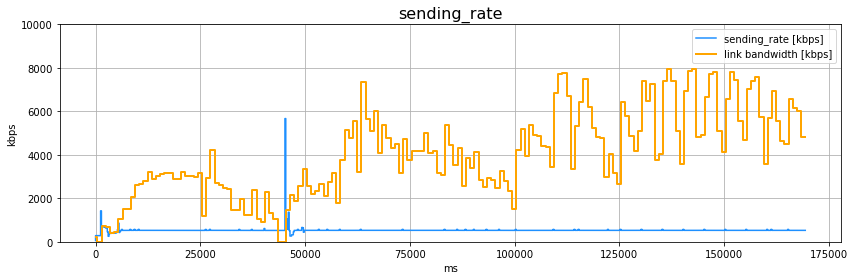



report_bus_0009


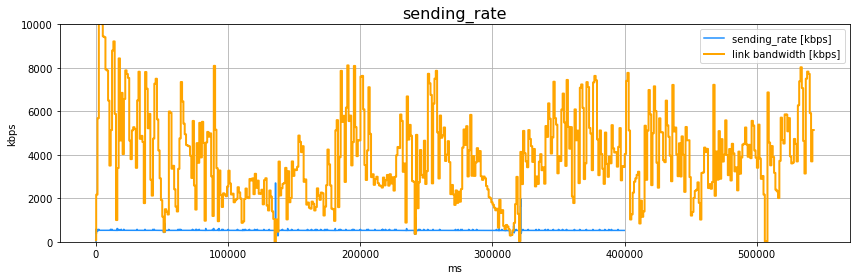



report_train_0003


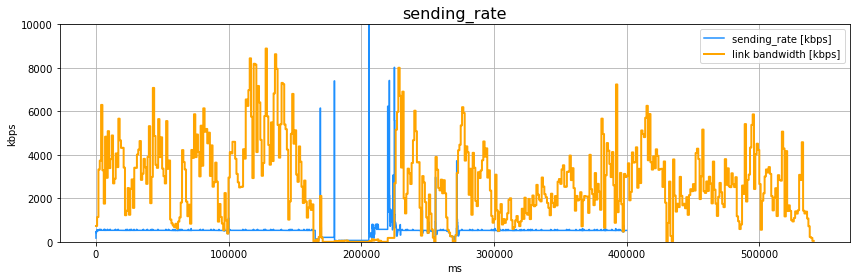



report_foot_0006


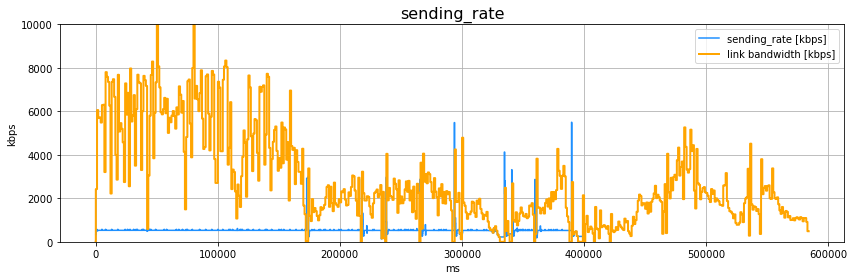



report_foot_0007


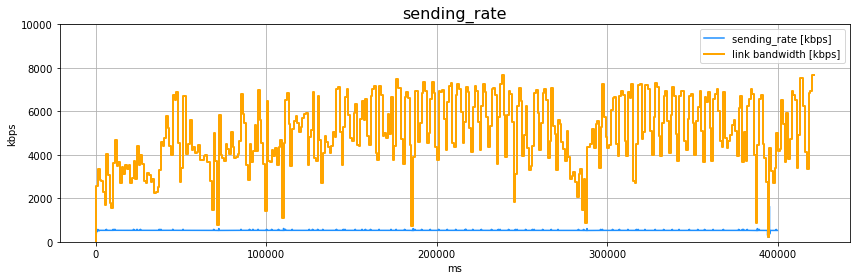



report_bus_0008


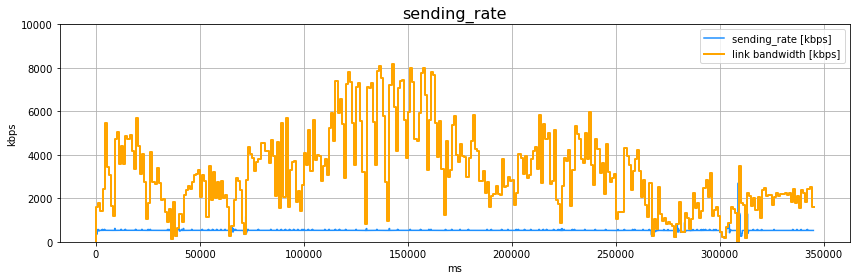



report_bicycle_0002


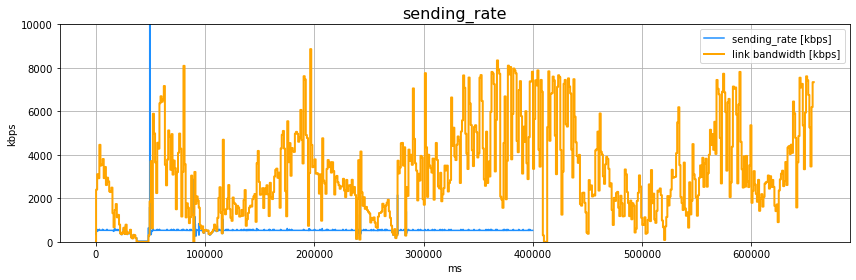



report_train_0002


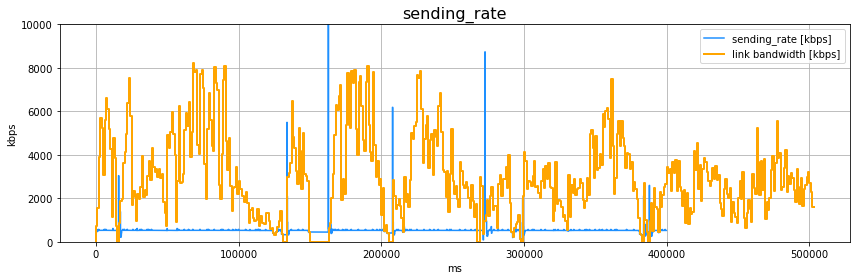



report_bus_0007


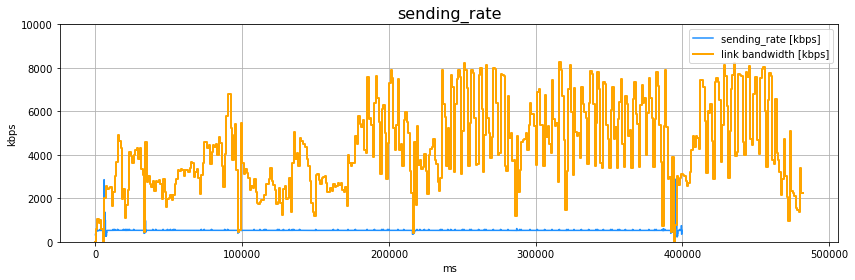



report_tram_0003


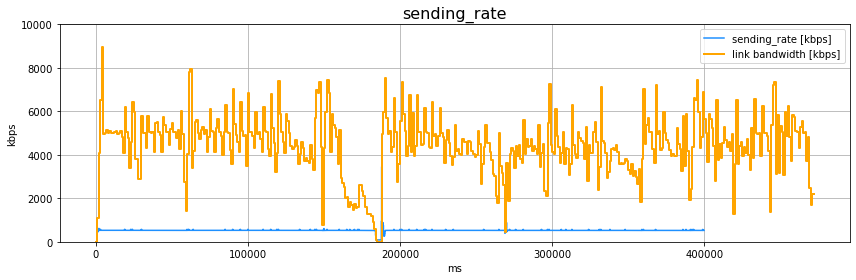



report_car_0007


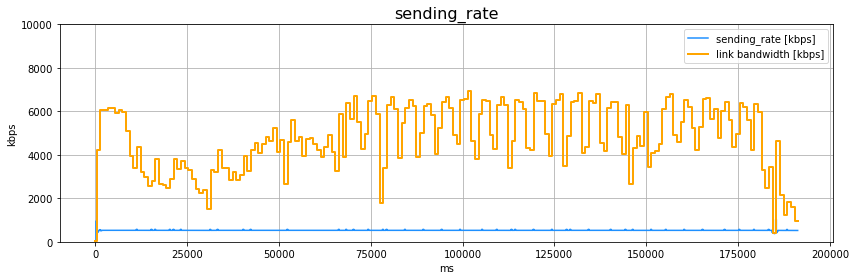



report_bus_0011


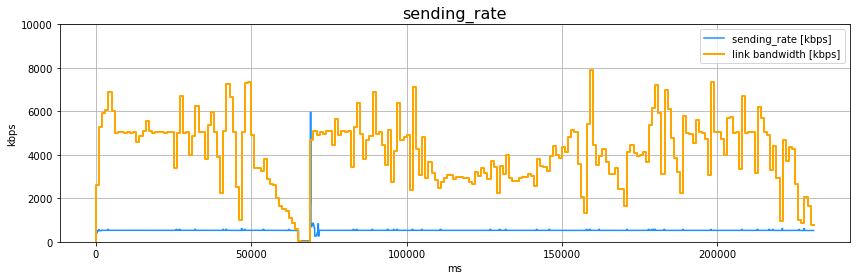



report_bus_0002


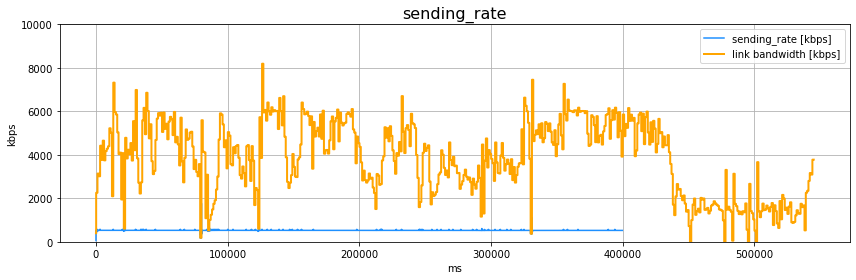



report_bus_0005


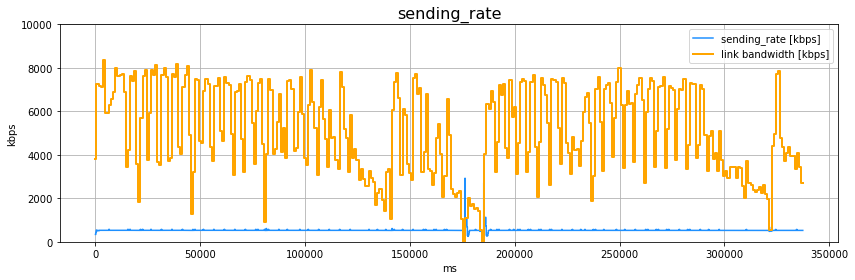



report_train_0001


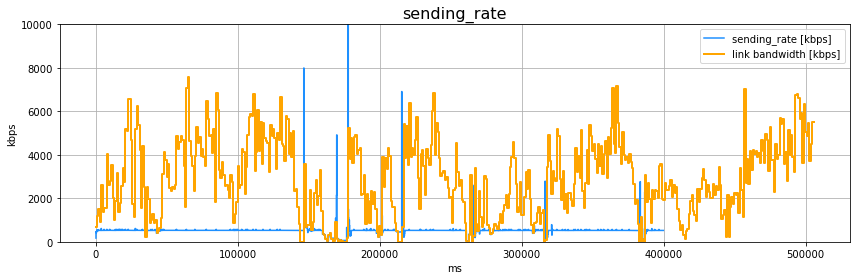



report_bicycle_0001


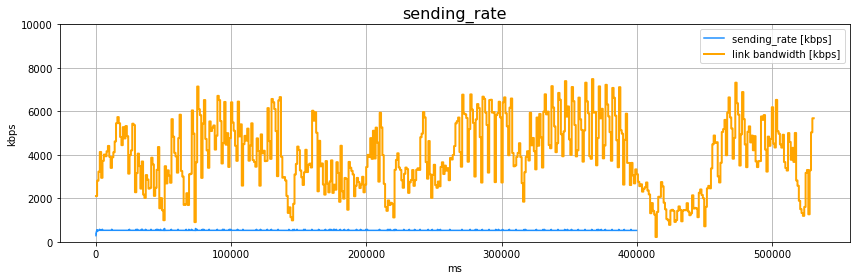



report_foot_0003


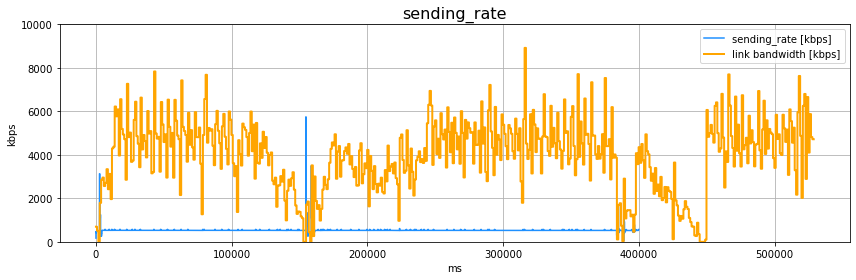



report_tram_0008


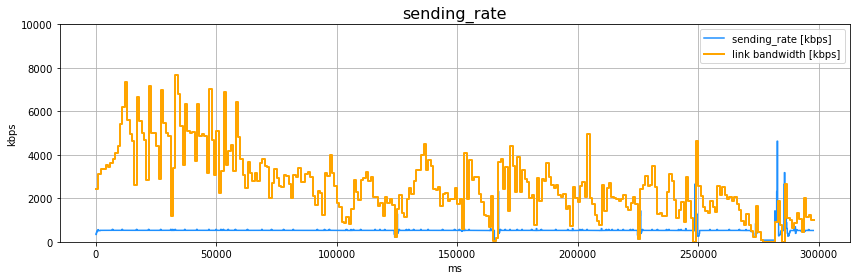



report_car_0006


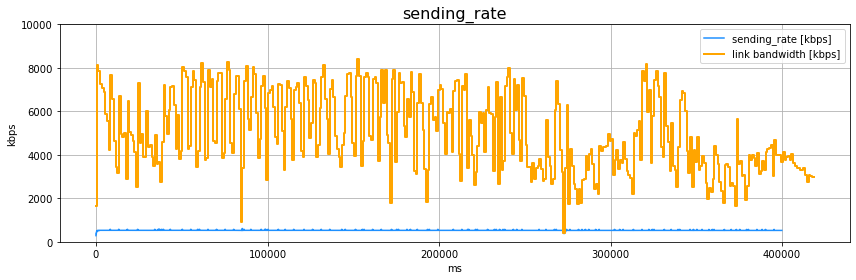



report_car_0005


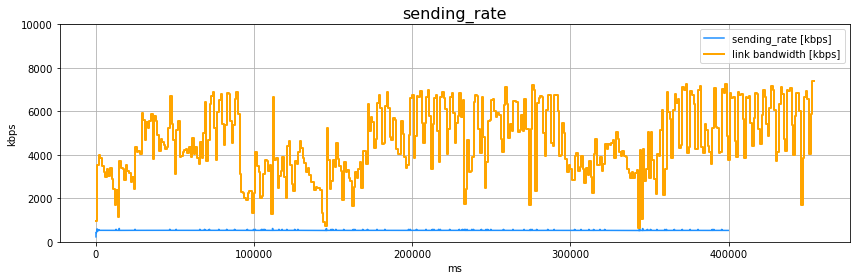



report_tram_0005


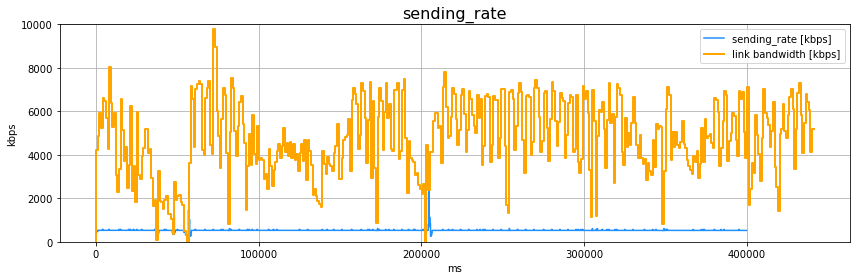



report_car_0001


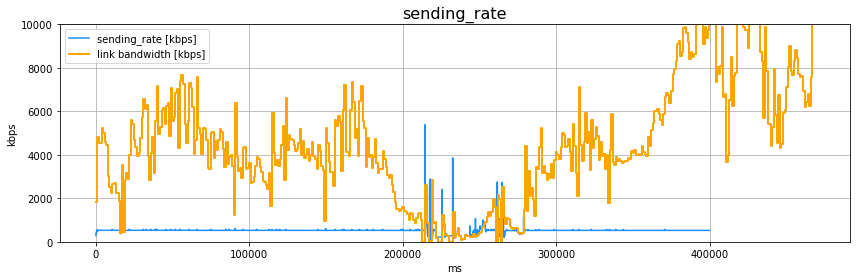



report_tram_0001


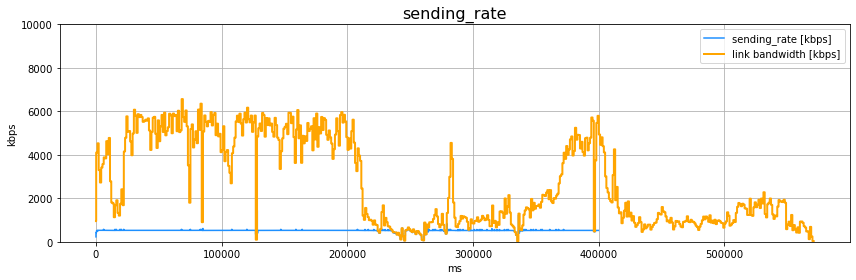



report_tram_0004


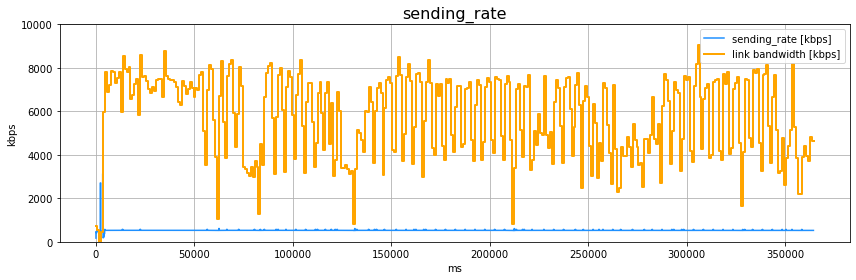



report_tram_0007


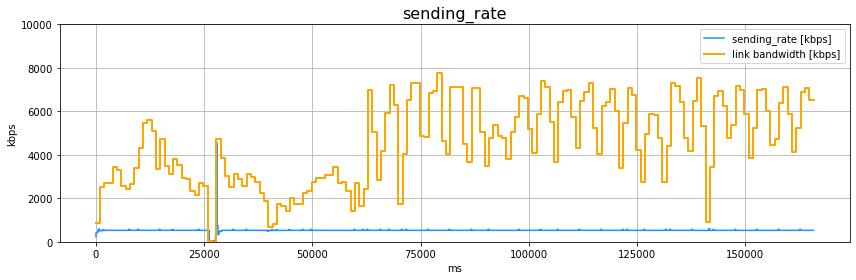



report_bus_0001


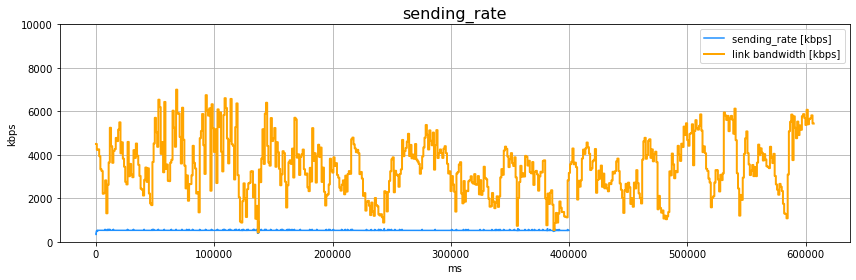



report_bus_0004


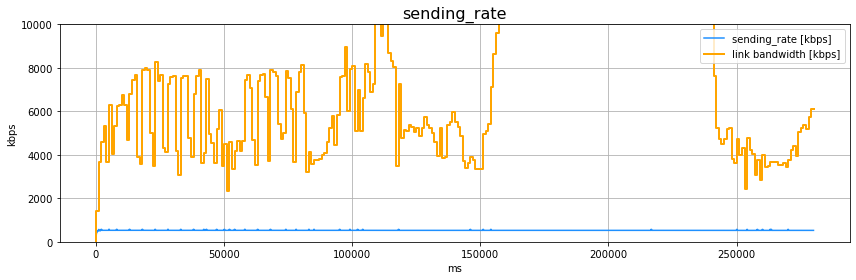



report_tram_0002


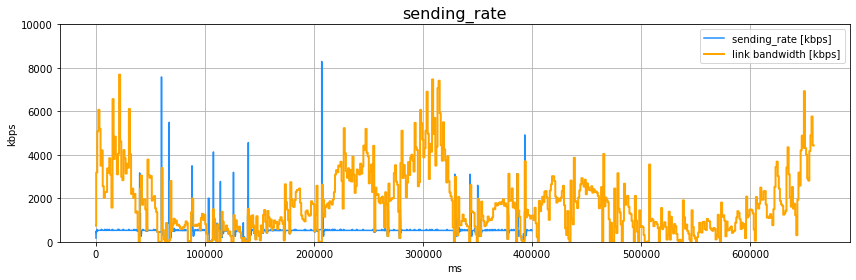



report_foot_0002


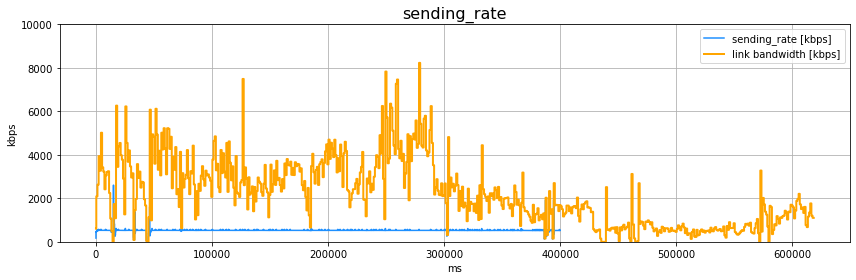



report_tram_0006


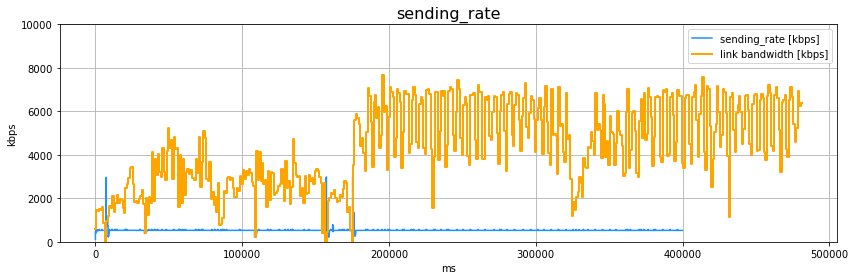



report_car_0004


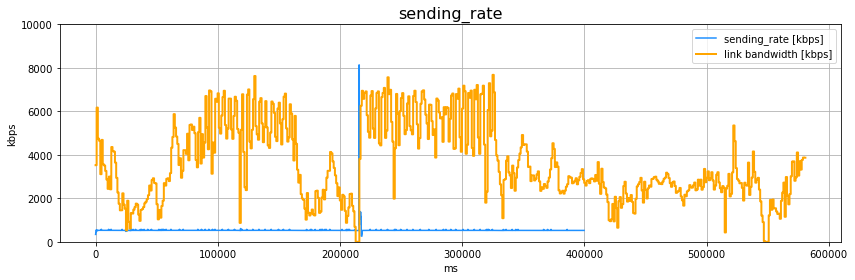



report_bus_0006


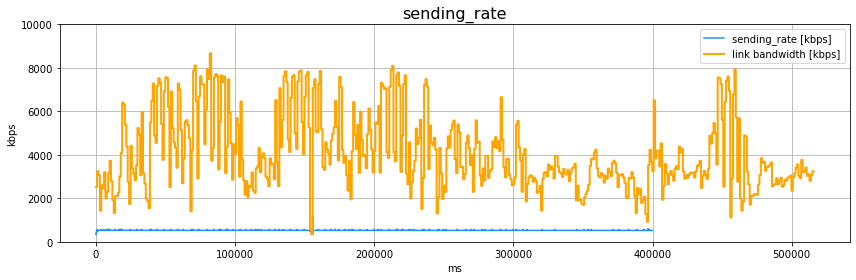



report_foot_0005


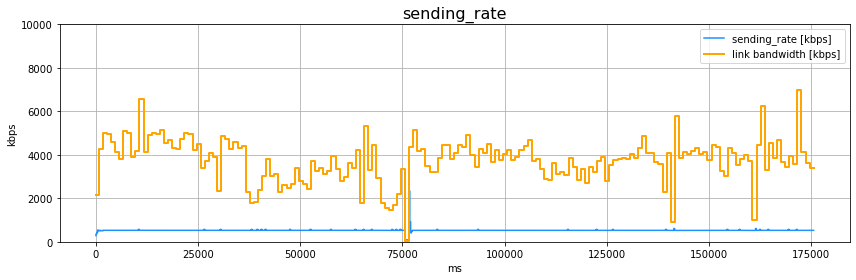

In [19]:
plot_gcc = False

for key in l_rate.keys():
    
#     print(f"Trace: {key}")
    colors = iter(["dodgerblue", "teal", "indianred", "olive", "yellow", "green"])

    # for metric in ["bandwidth_prediction", "receiving_rate", "sending_rate", "delay", "loss_ratio", "reward"]:
    for metric in ["sending_rate"]: # "delay", "loss_ratio", "reward"
        #Define capacity

#         trace_name = "../" + key.split("/")[1] + "/" + key.split("/")[2]
        trace_name = os.path.join("../new_data/logs_all_4G_Ghent_json", os.path.basename(key))
#         print(trace_name)
        REAL_NAME = os.path.basename(key).split(".")[0]
        print(REAL_NAME)
        
        if plot_gcc:
            pickle_path_gcc = f"../apply_model/results_gcc/rates_delay_loss_gcc_{REAL_NAME}.pickle"
            l_rate_gcc = pd.read_pickle(pickle_path_gcc)

            if l_rate_gcc["trace_name"] != REAL_NAME:
                print("Trace not the same as GCC")

        with open(trace_name, "r") as f:
            d = json.load(f)

        df = pd.DataFrame(d["uplink"]["trace_pattern"])
        time = [0] + list(df["duration"].cumsum())
        capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
        

        df_rate = pd.DataFrame(l_rate[key][metric], columns=[metric])
        if plot_gcc and (metric != "reward"):
            df_rate_gcc = pd.DataFrame(l_rate_gcc[metric], columns=[metric])
            df_rate = df_rate.join(df_rate_gcc, rsuffix="_gcc")

        t = np.arange(len(df_rate))*time_step
        df_rate["time"] = t
        df_rate.set_index("time", inplace=True)


        if metric in ["bandwidth_prediction", "sending_rate", "receiving_rate"]:

            plt.figure(figsize=(12,4))
            plt.title(metric, fontsize=16)
            # color=next(colors)
            plt.step(df_rate.index, df_rate[metric]/1000, label=f"{metric} [kbps]", color="dodgerblue")
            plt.step(time, capacities, lw=2, label="link bandwidth [kbps]", color="orange")
            if plot_gcc and (metric != "reward"):
                plt.step(df_rate.index, df_rate[f"{metric}_gcc"]/1000, label=f"{metric} GCC [kbps]", color="red")
            plt.legend()
            plt.ylabel("kbps")
            plt.xlabel("ms")
            plt.grid()
            
            plt.ylim((0, 10000))
            
            if REAL_NAME == "WIRED_200kbps":
                plt.xlim((0, 50000))
            if REAL_NAME == "WIRED_35mbps":
                plt.ylim((0, 40000))
            elif REAL_NAME == "4G_700kbps":
                plt.ylim(0, 1500)
            elif REAL_NAME == "4G_3mbps":
                plt.ylim(0,8000)
            elif REAL_NAME == "4G_500kbps":
                plt.ylim(0,1600)
            elif REAL_NAME == "5G_12mbps":
                plt.ylim(0,20000)
            elif REAL_NAME == "5G_13mbps":
                plt.ylim(0,20000)
            plt.tight_layout()

        else:
            plt.figure(figsize=(12,4))
            plt.title(metric, fontsize=16)
            plt.step(df_rate.index, df_rate[metric], label=f"{metric}", color="dodgerblue")
            if plot_gcc and (metric != "reward"):
                plt.step(df_rate.index, df_rate[f"{metric}_gcc"], label=f"{metric} GCC", color="red")
            plt.ylabel(metric)
            plt.xlabel("ms")
            plt.legend()
            plt.grid()
            if metric == "reward":
                plt.tight_layout()
                plt.ylim(-1.05,1.05)
#                 plt.savefig(f"./plots/reward_{REAL_NAME}_{reward_profile}.png")
            elif metric in ["Rl", "Ru", "Rd"]:
                plt.ylim(-1.05,1.05)
            
        plt.show()
        print("\n")